# <b><span style='color:#F1A424'>AutoML - Binary Classification - Wine Quality Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Data imbalance handling with 'SMOTE' method.
- Outlier filteration with 'carling' method and deletion of outliers for 'residual_sugar'.
- Feature scaling with 'std' method.
- Addition of customized value in hyperparameter 'k' for 'knn' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [5]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [6]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [7]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [9]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,1
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,2
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,1
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good,2
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,2
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,2
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,2
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,1


In [10]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
wine_df_train.shape

(1279, 12)

In [12]:
# test data shape
wine_df_test.shape

(320, 12)

In [13]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.2,0.645,0.0,2.15,0.08,15.0,28.0,0.99444,3.78,0.61,12.5,good
5.2,0.32,0.25,1.8,0.103,13.0,50.0,0.9957,3.38,0.55,9.2,bad
5.2,0.34,0.0,1.8,0.05,27.0,63.0,0.9916,3.68,0.79,14.0,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [14]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.9924,3.46,0.87,12.9,good
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
5.2,0.49,0.26,2.3,0.09,23.0,74.0,0.9953,3.71,0.62,12.2,good
5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.5,0.64,10.2,good
5.6,0.66,0.0,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
5.2,0.34,0.0,1.8,0.05,27.0,63.0,0.9916,3.68,0.79,14.0,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good


In [15]:
AutoML.generate_custom_config("custom_wine_quality")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,2,3,4



Customizing Data Imbalance Handling ...

Available data sampling methods with corresponding indices:
Index 1: SMOTE
Index 2: NearMiss



Enter the corresponding index data imbalance handling method:  1



Customization of data imbalance handling has been completed successfully.

Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  3

Enter the feature or list of features for outlier handling:  residual_sugar



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature residual_sugar:  1



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  3



Available hyperparameters for model 'knn' with corresponding indices:
Index 0: k



Enter the list of hyperparameter indices for model 'knn':  0

Enter the index of corresponding update method for hyperparameters 'k' for model 'knn':  1

Enter the list of value for hyperparameter 'k' for model 'knn':  2



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_wine_quality.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluding 'svm' and 'glm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoML(task_type="Classification",
             exclude=['svm', 'glm'],
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=200,
             verbose=2,
             custom_config_file='custom_wine_quality.json')


Received below input for customization : 
{
    "DataImbalanceIndicator": true,
    "DataImbalanceMethod": "SMOTE",
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "carling",
    "OutlierFilterParam": {
        "residual_sugar": {
            "replacement_value": "delete"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "std"
    },
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "knn": {
            "k": {
                "Method": "ADD",
                "Value": [
                    2
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
volatile_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
free_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0
sulphates,FLOAT,1279,0,None,0,1279,0,0.0,100.0
quality,VARCHAR(20) CHARACTER SET LATIN,1279,0,0,None,None,None,0.0,100.0
total_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
citric_acid,FLOAT,1279,0,None,110,1169,0,0.0,100.0


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol
func                                                                                                                                                              
50%            7.900             0.520        0.260           2.200      0.079               14.000                38.000     0.997     3.310      0.620    10.200
count       1279.000          1279.000     1279.000        1279.000   1279.000             1279.000              1279.000  1279.000  1279.000   1279.000  1279.000
mean           8.321             0.526        0.273           2.544      0.087               15.821                46.356     0.997     3.313      0.660    10.419
min            4.600             0.120        0.000           0.900      0.012                1.000                 6.000     0.990     2.860      0.330     8.400
max           15.600  

func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
min,4.6,0.12,0,0.9,0.012,1,6,0.99,2.86,0.33,8.4
std,1.731,0.18,0.194,1.414,0.044,10.48,32.608,0.002,0.154,0.168,1.049
25%,7.1,0.39,0.1,1.9,0.07,7,22,0.996,3.21,0.55,9.5
50%,7.9,0.52,0.26,2.2,0.079,14,38,0.997,3.31,0.62,10.2
75%,9.3,0.64,0.43,2.6,0.091,21,62,0.998,3.4,0.73,11.1
max,15.6,1.58,0.79,15.4,0.467,72,278,1.004,4.01,1.98,14
mean,8.321,0.526,0.273,2.544,0.087,15.821,46.356,0.997,3.313,0.66,10.419
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


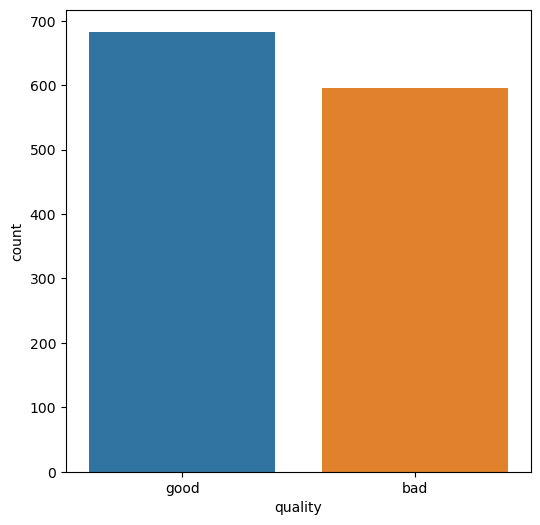

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0               density           3.049257
1      volatile_acidity           1.172791
2   free_sulfur_dioxide           2.032838
3                    pH           2.111024
4               alcohol           0.625489
5  total_sulfur_dioxide           3.596560
6         fixed_acidity           2.111024
7        residual_sugar           9.773260
8             chlorides           6.411259
9             sulphates           3.674746


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
8.2,0.885,0.2,1.4,0.086,7.0,31.0,0.9946,3.11,0.46,10.0,bad
8.6,0.37,0.65,6.4,0.08,3.0,8.0,0.99817,3.27,0.58,11.0,bad
8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.8,11.2,bad
8.4,0.29,0.4,1.7,0.067,8.0,20.0,0.99603,3.39,0.6,10.5,bad
13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.0014,3.06,0.8,10.0,good
7.5,0.52,0.42,2.3,0.087,8.0,38.0,0.9972,3.58,0.61,10.5,good
9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,good
9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.9984,3.16,0.7,9.4,bad
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.9976,3.21,1.05,10.8,good


Remaining Rows in the data: 1127                                                        
Remaining Columns in the data: 12


Skipping customized anti-select columns.                                                


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0             sulphates           9.760426
1      volatile_acidity           9.582964
2  total_sulfur_dioxide           8.429459
3           citric_acid           4.880213
4                    pH           9.139308
5                    id           9.937888
6             chlorides           9.671695
7               density           9.494232
8         fixed_acidity           9.494232
9               alcohol           7.453416


['total_sulfur_dioxide', 'alcohol', 'fixed_acidity', 'volatile_acidity', 'pH', 'free_sulfur_dioxide', 'chlorides', 'residual_sugar', 'sulphates', 'citric_acid', 'density']


['total_sulfur_dioxide', 'alcohol', 'fixed_acidity', 'volatile_acidity', 'pH', 'free_sulfur_dioxide', 'chlorides', 'residual_sugar', 'sulphates', 'citric_acid', 'density']


id,quality,total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,residual_sugar,sulphates,citric_acid,density
10,1,-0.6965260664542596,0.5473006118509043,1.2606118364669572,-1.5736452319163328,-1.0786429786523726,-0.9757854820899197,-0.49527837474736547,-0.38475771163359157,1.4230370536509505,1.035103764732606,0.5966408726090554
12,0,-0.824510319697223,0.07296411419782187,0.037625943214445644,-1.2997296127838112,0.5184767284431255,-0.7719660602434611,-0.4725530512096994,-1.0798258823066293,-0.3600567525698818,0.672586431128309,-0.41093146192935964
14,1,1.6711826185405625,-0.875708881108343,0.38705048414373455,-0.3684165077332377,0.05265014720693708,0.34904075991206013,0.11830536076961778,0.8316115870442236,-0.18174737194779841,0.20649271649421247,0.7645695950321039
16,0,-1.0164866995616681,-0.7808415815777269,2.308885459254825,-0.14928401242722059,-0.8124563608031229,-1.0776951930131489,0.027404066618953508,-0.21099066896533206,-1.3110401158876588,1.1386801457624052,1.9400706519935673
18,1,-0.7605181930757413,0.357566012789672,1.2606118364669572,-1.5736452319163328,-0.6793630518784981,-0.9757854820899197,-0.24529981583303903,-0.9060588396383698,2.314583956761367,0.776162812158108,0.48468839099368977
19,1,-0.2485811801038879,3.0138503996469326,-0.5447482916677029,-0.916247745998281,0.4519300739808116,0.2471310489888309,-0.29075046290837114,-0.9060588396383698,1.3041641332362284,0.36185728803891143,-1.9222899637369821
17,1,-0.2485811801038879,0.07296411419782187,-0.4865108681794882,-0.03971776477421186,1.78286316322706,-0.7719660602434611,-0.018046580456378632,-0.037223626297073306,-0.3006202923625207,0.776162812158108,0.2607834277628963
11,0,0.8392849724613006,0.5473006118509043,-0.5447482916677029,-0.916247745998281,0.5184767284431255,1.0624087363746646,-0.018046580456378632,0.48407750170770525,0.11543492908900718,0.10291633546441317,-0.18702649869862836
9,1,-0.08860086355018372,-0.4013723834552606,3.124209388089832,-0.6149405649525073,-1.677562868813183,0.1452213380656017,-0.06349722753171046,1.005378629712483,0.8286724515773399,2.122655765545498,2.6117855416858853
8,1,0.007387326382038795,-0.21163778439402828,2.308885459254825,-1.4092958604368195,-0.745909706340809,1.266228158221123,-0.1998491687577069,1.3529127150490021,0.8286724515773399,1.1386801457624052,1.4362844847243599


['total_sulfur_dioxide', 'alcohol', 'volatile_acidity', 'pH', 'chlorides', 'sulphates', 'citric_acid', 'density']


['r_total_sulfur_dioxide', 'r_alcohol', 'r_volatile_acidity', 'r_pH', 'r_chlorides', 'r_sulphates', 'r_citric_acid', 'r_density']


id,quality,r_total_sulfur_dioxide,r_alcohol,r_volatile_acidity,r_pH,r_chlorides,r_sulphates,r_citric_acid,r_density
10,1,-0.6965260664542596,0.5473006118509043,-1.5736452319163328,-1.0786429786523726,-0.49527837474736547,1.4230370536509505,1.035103764732606,0.5966408726090554
12,0,-0.824510319697223,0.07296411419782187,-1.2997296127838112,0.5184767284431255,-0.4725530512096994,-0.3600567525698818,0.672586431128309,-0.41093146192935964
14,1,1.6711826185405625,-0.875708881108343,-0.3684165077332377,0.05265014720693708,0.11830536076961778,-0.18174737194779841,0.20649271649421247,0.7645695950321039
16,0,-1.0164866995616681,-0.7808415815777269,-0.14928401242722059,-0.8124563608031229,0.027404066618953508,-1.3110401158876588,1.1386801457624052,1.9400706519935673
18,1,-0.7605181930757413,0.357566012789672,-1.5736452319163328,-0.6793630518784981,-0.24529981583303903,2.314583956761367,0.776162812158108,0.48468839099368977
19,1,-0.2485811801038879,3.0138503996469326,-0.916247745998281,0.4519300739808116,-0.29075046290837114,1.3041641332362284,0.36185728803891143,-1.9222899637369821
17,1,-0.2485811801038879,0.07296411419782187,-0.03971776477421186,1.78286316322706,-0.018046580456378632,-0.3006202923625207,0.776162812158108,0.2607834277628963
11,0,0.8392849724613006,0.5473006118509043,-0.916247745998281,0.5184767284431255,-0.018046580456378632,0.11543492908900718,0.10291633546441317,-0.18702649869862836
9,1,-0.08860086355018372,-0.4013723834552606,-0.6149405649525073,-1.677562868813183,-0.06349722753171046,0.8286724515773399,2.122655765545498,2.6117855416858853
8,1,0.007387326382038795,-0.21163778439402828,-1.4092958604368195,-0.745909706340809,-0.1998491687577069,0.8286724515773399,1.1386801457624052,1.4362844847243599


['total_sulfur_dioxide', 'alcohol', 'fixed_acidity', 'volatile_acidity', 'pH', 'free_sulfur_dioxide', 'chlorides', 'residual_sugar', 'sulphates', 'citric_acid', 'density']


id,quality,total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,residual_sugar,sulphates,citric_acid,density
683,0,1.6071904919190811,-0.8757089927111525,-0.37003602120305934,0.7820290926233491,0.05265014720693997,0.14522133806560145,0.00467874308128397,-0.38475771163359274,-1.0732942750582175,-0.20781280762498427,-0.29947653006476904
547,0,3.3989700373205687,-0.9705763043316216,0.8529498720494559,2.4803059312449833,-0.413176434029245,1.9795961346837239,-0.22257449229537649,-0.03722362629707342,-1.0732942750582175,0.2582809070091121,0.708366620457234
12,0,-0.8245103196972232,0.07296412349354023,0.03762594321444574,-1.2997296127838163,0.5184767284431279,-0.7719660602434598,-0.47255305120970303,-1.0798258823066327,-0.36005675256988584,0.672586431128309,-0.3946617165029589
186,1,1.831162935094267,0.07296412349354023,0.09586336670266053,-1.3545127366103202,-0.08044316171768472,1.9795961346837239,0.09558003723194827,-0.9060588396383725,0.5314901505405288,1.501197479366703,0.09246247291602373
133,0,2.855036961037974,-0.9705763043316216,0.15410079019087533,-0.3136333839067381,-0.08044316171768472,1.4700475800675787,-0.26802513937070865,1.179145672380746,-0.7761119740214123,0.15470452597931283,0.48440147589681654
978,0,2.855036961037974,-0.8757089927111525,-1.4183096439909293,-1.8475608510488595,0.05265014720693997,4.2216097749947625,-0.9725101690383564,-1.0798258823066327,-1.3110401158876612,-0.3113891886547836,-1.8616334133738301
408,0,-0.9524945729401866,-1.9192494205363144,1.2023744129787457,0.4533303496643228,-1.0120963241900547,-1.0776951930131469,2.5499149792998828,-0.38475771163359274,-0.18174737194780274,1.1386801457624052,1.4922446264187574
1007,0,-0.9524945729401866,0.7370353048368246,0.561762754608381,-0.2588502600802337,-0.6128163974161805,-0.9757854820899179,0.8909663610502604,-0.38475771163359274,0.3531807699184458,0.10291633546441317,0.036471186775919366
121,0,-1.1764670161153725,0.45243336997541767,-0.48651086817948946,0.8642037783631057,0.4519300739808141,-1.0776951930131469,-0.6770809630486976,0.3103104590394467,-0.6572390536066903,-1.036423855863378,-0.23228698669663136
324,0,-1.1764670161153725,-0.11677049974739767,-0.6612231386441344,0.2889809781848096,0.1191968016692538,-1.2815146148596048,0.5955371550606017,-0.38475771163359274,-0.5383661331919689,1.3976210983369035,0.2548372027223513


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


                                                                                          
Completed customized hyperparameter update.


response_column : quality                                                                                                                             
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : quality
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
---------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.725490,0.725490,0.725490,0.725490,0.723797,0.723017,0.723336,0.725151,0.725490,0.725251
1,2,XGBOOST_3,lasso,0.700980,0.700980,0.700980,0.700980,0.700637,0.694874,0.695649,0.700782,0.700980,0.698808
2,3,XGBOOST_0,lasso,0.700980,0.700980,0.700980,0.700980,0.700637,0.694874,0.695649,0.700782,0.700980,0.698808
3,4,KNN_9,lasso,0.696078,0.696078,0.696078,0.696078,0.694099,0.693424,0.693694,0.695683,0.696078,0.695813
4,5,XGBOOST_2,pca,0.681373,0.681373,0.681373,0.681373,0.680970,0.674371,0.674801,0.681123,0.681373,0.678427
5,6,KNN_4,rfe,0.666667,0.666667,0.666667,0.666667,0.666667,0.667698,0.666153,0.669742,0.666667,0.667180
6,7,XGBOOST_1,rfe,0.666667,0.666667,0.666667,0.666667,0.664881,0.660735,0.661163,0.665675,0.666667,0.664550
7,8,KNN_0,lasso,0.661765,0.661765,0.661765,0.661765,0.660750,0.661605,0.660778,0.663455,0.661765,0.662213
8,9,KNN_8,pca,0.661765,0.661765,0.661765,0.661765,0.659826,0.660058,0.659926,0.662042,0.661765,0.661887
9,10,DECISIONFOREST_2,pca,0.661765,0.661765,0.661765,0.661765,0.661877,0.653095,0.652676,0.661841,0.661765,0.657083


In [17]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.725490,0.725490,0.725490,0.725490,0.723797,0.723017,0.723336,0.725151,0.725490,0.725251
1,2,XGBOOST_3,lasso,0.700980,0.700980,0.700980,0.700980,0.700637,0.694874,0.695649,0.700782,0.700980,0.698808
2,3,XGBOOST_0,lasso,0.700980,0.700980,0.700980,0.700980,0.700637,0.694874,0.695649,0.700782,0.700980,0.698808
3,4,KNN_9,lasso,0.696078,0.696078,0.696078,0.696078,0.694099,0.693424,0.693694,0.695683,0.696078,0.695813
4,5,XGBOOST_2,pca,0.681373,0.681373,0.681373,0.681373,0.680970,0.674371,0.674801,0.681123,0.681373,0.678427
5,6,KNN_4,rfe,0.666667,0.666667,0.666667,0.666667,0.666667,0.667698,0.666153,0.669742,0.666667,0.667180
6,7,XGBOOST_1,rfe,0.666667,0.666667,0.666667,0.666667,0.664881,0.660735,0.661163,0.665675,0.666667,0.664550
7,8,KNN_0,lasso,0.661765,0.661765,0.661765,0.661765,0.660750,0.661605,0.660778,0.663455,0.661765,0.662213
8,9,KNN_8,pca,0.661765,0.661765,0.661765,0.661765,0.659826,0.660058,0.659926,0.662042,0.661765,0.661887
9,10,DECISIONFOREST_2,pca,0.661765,0.661765,0.661765,0.661765,0.661877,0.653095,0.652676,0.661841,0.661765,0.657083


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,DECISIONFOREST_3,lasso,0.72549,0.72549,0.72549,0.72549,0.723797,0.723017,0.723336,0.725151,0.72549,0.725251


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=2)

{'response_column': 'quality',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 20,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

In [21]:
aml.model_hyperparameters(rank=5)

{'response_column': 'quality',
 'name': 'xgboost',
 'model_type': 'Classification',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 5,
 'min_node_size': 1,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0']}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(wine_df_test,3)

Data Transformation started ...


total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,id,residual_sugar,sulphates,citric_acid,density,quality
124.0,10.5,7.0,0.58,3.44,34.0,0.091,215,1.9,0.48,0.12,0.9956,0
9.0,9.4,7.7,0.66,3.4,4.0,0.039,203,1.6,0.47,0.04,0.9962,0
9.0,11.5,6.1,0.56,3.59,6.0,0.079,109,2.2,0.54,0.0,0.9948,1
106.0,9.1,9.1,0.47,3.08,38.0,0.094,294,2.6,0.59,0.49,0.9982,0
134.0,9.4,8.0,0.745,3.24,30.0,0.118,178,2.0,0.66,0.56,0.9968,0
121.0,9.4,7.4,0.6,3.37,36.0,0.07,35,7.3,0.49,0.26,0.9982,0
65.0,9.2,8.1,0.575,3.29,12.0,0.077,404,2.1,0.51,0.22,0.9967,0
65.0,10.4,10.1,0.65,3.32,11.0,0.11,340,5.1,0.64,0.37,1.0026,1
75.0,9.4,10.3,0.34,3.18,15.0,0.159,83,2.8,0.64,0.52,0.9998,0
44.0,11.0,8.4,0.56,3.13,16.0,0.105,20,2.1,0.52,0.08,0.9958,0


id,total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,residual_sugar,sulphates,citric_acid,density,quality
141,7.0,11.4,6.9,0.39,3.44,4.0,0.102,2.1,0.58,0.24,0.9946,0
343,106.0,12.9,4.7,0.6,3.85,17.0,0.058,2.3,0.6,0.17,0.9932,1
36,19.0,11.2,8.4,0.37,3.17,12.0,0.063,2.3,0.81,0.43,0.9955,1
116,27.0,9.6,7.2,0.57,3.36,9.0,0.076,1.6,0.7,0.06,0.9972,1
154,37.0,9.5,7.9,0.43,3.17,10.0,0.106,1.6,0.91,0.21,0.9966,0
295,72.0,9.5,7.0,0.45,3.55,16.0,0.082,2.7,0.6,0.34,0.998,0
238,39.0,10.9,9.5,0.39,3.29,18.0,0.069,8.9,0.81,0.41,0.9986,1
181,22.0,11.2,11.1,0.45,3.17,6.0,0.066,3.2,0.66,0.73,0.9986,1
244,31.0,12.4,7.1,0.16,3.35,17.0,0.068,2.5,0.54,0.44,0.9933,1
61,49.0,9.6,12.5,0.46,3.05,26.0,0.07,4.5,0.57,0.49,0.9981,0


id,quality,total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,residual_sugar,sulphates,citric_acid,density
101,1,-0.44055755996833296,0.26269871325905414,2.075935765301965,0.23419785435830934,-1.2782829420393085,-0.9757854820899197,-0.13167319814470868,0.48407750170770525,0.7097995311626177,1.190468336277305,2.1639756152242984
162,1,0.5193243393538922,-0.4013723834552606,-0.19532375073841396,1.0833362736691263,0.2522901105938758,-0.5681466383970027,-0.1089478746070426,0.8316115870442236,-0.5978025933993256,-0.15602461711008478,0.09285470533984787
223,0,0.6793046559075965,-0.9705761806389591,-0.7776979856205625,2.452914369331734,0.2522901105938758,-0.36432721655054434,-0.018046580456378632,-0.5585247543018511,-0.3600567525698818,-1.1917884274080768,-0.5788601843524082
122,0,3.0470133409024185,-0.49623968298587673,-0.2535611742266286,0.891595340276361,-0.4131764340292484,1.775776712837269,-0.17712384522004082,-0.38475771163359157,-0.8949848944361313,-0.3113891886547836,-0.298978980313994
326,0,0.8072889091505598,4.247125293544948,4.4054327048305595,-0.916247745998281,-2.2099361045116823,0.6547698926817478,0.186481331382616,8.998662592452414,1.0664182924067838,1.967291194000799,0.48468839099368977
99,1,-1.208463079426113,1.3062390080958368,1.144136989490528,-1.4092958604368195,-1.0120963241900587,-1.2815146148596073,-0.9270595219630204,-1.6011270103114075,-0.8949848944361313,1.501197479366703,-1.1386225924292985
61,0,0.10337551631426131,-0.7808415815777269,2.425360306231254,-0.3684165077332377,-1.7441095232754968,1.0624087363746646,-0.4043770805967012,3.785651312404633,-0.5383661331919651,1.1386801457624052,0.7645695950321039
244,1,-0.4725536232790738,1.8754428052795356,-0.7194605621323478,-2.011910222528367,0.2522901105938758,0.1452213380656017,-0.44982772767203333,0.3103104590394457,-0.7166755138140478,0.8797391931879073,-1.9222899637369821
40,0,0.03938338969277964,-0.875708881108343,-0.31179859771484375,0.17941473053180557,-0.8124563608031229,-0.36432721655054434,0.36828391968394425,-0.9060588396383698,1.601346434273034,-0.41496556968458276,-0.18702649869862836
120,0,-0.8565063830079639,-0.5911069825164929,-0.31179859771484375,0.0150653590522925,-1.0120963241900587,-1.2815146148596073,-0.24529981583303903,-1.2535929249748883,-1.1921671954729365,-1.3471529989527755,-0.97069387000625


id,total_sulfur_dioxide,alcohol,volatile_acidity,pH,chlorides,sulphates,citric_acid,density,quality
38,50.0,10.9,0.39,3.2,0.044,0.83,0.4,0.9948,1
198,36.0,9.8,0.54,3.61,0.076,0.64,0.13,0.9973,0
259,45.0,10.7,0.78,3.31,0.076,0.62,0.0,0.9961,1
55,35.0,9.5,0.38,3.33,0.08,0.47,0.21,0.9961,0
339,10.0,9.1,0.84,3.12,0.05,0.48,0.34,0.9955,1
135,70.0,10.1,0.32,3.43,0.066,0.62,0.23,0.9959,0
177,26.0,12.5,0.52,3.4,0.07,0.72,0.08,0.9936,1
118,52.0,9.5,0.715,3.23,0.089,0.77,0.15,0.9968,0
242,25.0,9.9,0.6,3.03,0.063,0.57,0.65,0.9997,0
80,45.0,12.7,0.57,3.46,0.065,0.74,0.09,0.9942,1


id,quality,r_total_sulfur_dioxide,r_alcohol,r_volatile_acidity,r_pH,r_chlorides,r_sulphates,r_citric_acid,r_density
122,0,3.0470133409024185,-0.49623968298587673,0.891595340276361,-0.4131764340292484,-0.17712384522004082,-0.8949848944361313,-0.3113891886547836,-0.298978980313994
101,1,-0.44055755996833296,0.26269871325905414,0.23419785435830934,-1.2782829420393085,-0.13167319814470868,0.7097995311626177,1.190468336277305,2.1639756152242984
284,0,-1.0164866995616681,0.45243331232028816,-0.3136333839067337,0.5850233829054364,-0.4725530512096994,-0.47892967298460404,-1.398941189467675,-0.8587413883908843
326,0,0.8072889091505598,4.247125293544948,-0.916247745998281,-2.2099361045116823,0.186481331382616,1.0664182924067838,1.967291194000799,0.48468839099368977
183,0,0.167367642935743,-0.9705761806389591,0.782029092623353,-1.0120963241900587,7.117705010370761,2.8495120986276157,-0.05244823608028548,0.09285470533984787
364,1,-0.056604800239442886,1.4959736071570693,-1.0258139936512893,-0.6793630518784981,-0.4725530512096994,-0.5978025933993256,-0.000660045565385835,-1.642408759698506
40,0,0.03938338969277964,-0.875708881108343,0.17941473053180557,-0.8124563608031229,0.36828391968394425,1.601346434273034,-0.41496556968458276,-0.18702649869862836
120,0,-0.8565063830079639,-0.5911069825164929,0.0150653590522925,-1.0120963241900587,-0.24529981583303903,-1.1921671954729365,-1.3471529989527755,-0.97069387000625
162,1,0.5193243393538922,-0.4013723834552606,1.0833362736691263,0.2522901105938758,-0.1089478746070426,-0.5978025933993256,-0.15602461711008478,0.09285470533984787
223,0,0.6793046559075965,-0.9705761806389591,2.452914369331734,0.2522901105938758,-0.018046580456378632,-0.3600567525698818,-1.1917884274080768,-0.5788601843524082


id,quality,total_sulfur_dioxide,alcohol,fixed_acidity,volatile_acidity,pH,free_sulfur_dioxide,chlorides,residual_sugar,sulphates,citric_acid,density
101,1,-0.44055755996833307,0.26269874673447813,2.0759357653019705,0.2341978543583052,-1.278282942039304,-0.9757854820899179,-0.13167319814471218,0.48407750170770675,0.709799531162612,1.190468336277305,2.164140060100072
80,1,-0.02460873692870205,2.160044979143864,-0.3117985977148446,0.2341978543583052,0.9843033096793129,1.8776864237604949,-0.5180036982850352,-0.03722362629707342,0.47205369033316785,-0.9328474748335788,-1.4193022528669808
242,0,-0.664530003143519,-0.49623974622927514,2.54183515320769,0.3985472258378184,-1.8772028322001166,-0.9757854820899179,-0.5634543453603673,-0.03722362629707342,-0.5383661331919689,1.967291194000799,1.6602184848391326
326,0,0.80728890915056,4.247125834794189,4.405432704830571,-0.9162477459982858,-2.209936104511677,0.6547698926817466,0.18648133138261258,8.998662592452442,1.0664182924067773,1.967291194000799,0.48440147589681654
40,0,0.039383389692779644,-0.8757089927111525,-0.3117985977148446,0.17941473053180143,-0.8124563608031191,-0.3643272165505437,0.3682839196839409,-0.9060588396383725,1.6013464342730266,-0.41496556968458276,-0.1874939577845603
120,0,-0.8565063830079641,-0.591107057849744,-0.3117985977148446,0.015065359052288252,-1.0120963241900547,-1.2815146148596048,-0.24529981583304256,-1.2535929249748923,-1.1921671954729391,-1.3471529989527755,-0.9713719637460837
61,0,0.10337551631426134,-0.7808416810906836,2.4253603062312608,-0.3684165077332422,-1.744109523275492,1.0624087363746626,-0.4043770805967048,3.7856513124046445,-0.5383661331919689,1.1386801457624052,0.7643579065973384
244,1,-0.4725536232790739,1.875443044282457,-0.7194605621323497,-2.0119102225283725,0.2522901105938785,0.14522133806560145,-0.44982772767203694,0.3103104590394467,-0.7166755138140513,0.8797391931879073,-1.9232238281279823
162,1,0.5193243393538923,-0.4013724346088062,-0.19532375073841446,1.0833362736691228,0.2522901105938785,-0.5681466383970017,-0.10894787460704611,0.8316115870442261,-0.5978025933993293,-0.15602461711008478,0.09246247291602373
223,0,0.6793046559075966,-0.9705763043316216,-0.7776979856205645,2.4529143693317312,0.2522901105938785,-0.3643272165505437,-0.01804658045638211,-0.5585247543018528,-0.36005675256988584,-1.1917884274080768,-0.5794329607652909


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,183,1.894882,1.380568,0.507355,6.682458,2.871999,-1.522571,-0.817267,-0.497219,-0.684970,0
1,101,3.154696,-0.572437,-1.293448,-0.452664,0.174533,0.489044,1.059492,-0.490087,0.230398,1
2,40,0.261995,0.212397,0.215428,1.788474,-0.260686,0.542156,0.890438,0.939035,0.016638,0
3,122,-0.585457,3.062390,1.354934,-0.635221,-0.631761,-1.234048,0.631554,-0.166078,0.686068,0
4,80,-1.949505,-0.454663,1.974682,-0.856345,1.151918,-0.174606,0.930541,-0.692944,-1.121919,1
5,326,5.939561,-1.416124,0.836798,-6.111628,6.782220,-2.035813,0.167866,1.488771,-0.428572,0
6,61,3.460193,1.000229,-0.629372,-2.856384,1.144260,-0.741400,-0.471832,1.068493,-0.960485,0
7,162,-0.407322,0.749025,-1.049815,-0.447564,0.505204,-0.326499,-0.001559,0.180169,0.795741,1
8,364,-0.862655,-1.700529,0.832871,-0.871733,0.326407,-1.298729,-0.510000,1.398243,0.430756,1
9,284,-1.824425,-1.220999,-0.587736,0.009160,-0.132364,0.151262,-0.249728,0.651736,-0.381736,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Target Column Mapping:
good: 1
bad: 0

Prediction : 
    id  Prediction  quality    prob_0    prob_1
0  101           1        1  0.164800  0.835200
1   80           1        1  0.010445  0.989555
2  242           0        0  0.571155  0.428845
3  183           0        0  0.815870  0.184130
4  162           0        1  0.624902  0.375098
5  223           0        0  0.565791  0.434209
6  122           0        0  0.867066  0.132934
7  387           1        1  0.033053  0.966947
8   61           0        0  0.838392  0.161608
9  244           1        1  0.138195  0.861805

ROC-AUC : 


AUC,GINI
0.8211423632935257,0.6422847265870515


threshold_value,tpr,fpr
0.04081632653061224,1.0,0.9256756756756757
0.08163265306122448,1.0,0.8175675675675675
0.1020408163265306,1.0,0.7702702702702703
0.12244897959183673,0.9941860465116279,0.7635135135135135
0.16326530612244897,0.9476744186046512,0.6756756756756757
0.18367346938775508,0.9418604651162791,0.6756756756756757
0.14285714285714285,0.9767441860465116,0.6959459459459459
0.061224489795918366,1.0,0.831081081081081
0.02040816326530612,1.0,0.9864864864864865
0.0,1.0,1.0



Confusion Matrix : 


array([[ 99,  49],
       [ 26, 146]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,Prediction,quality,prob_0,prob_1
10,1,1,0.026620796467248686,0.9733792035327513
12,1,1,0.01319171238895478,0.9868082876110452
13,1,1,0.34354500871158133,0.6564549912884187
14,1,0,0.48890332240967527,0.5110966775903247
16,1,0,0.06563058851082604,0.934369411489174
17,0,0,0.999466332093476,0.0005336679065239965
15,1,1,0.01319171238895478,0.9868082876110452
11,1,1,0.024743975029789755,0.9752560249702102
9,1,1,0.022045578606112448,0.9779544213938876
8,0,0,0.9413594711369604,0.058640528863039616


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(wine_df_test,3)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Target Column Mapping:
good: 1
bad: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       99       26   0.792000  0.668919  0.725275      148
1               1  CLASS_2       49      146   0.748718  0.848837  0.795640      172
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.765625
1       5     Macro-Precision     0.770359
2       6        Macro-Recall     0.758878
3       7            Macro-F1     0.760458
4       9     Weighted-Recall     0.765625
5      10         Weighted-F1     0.763096
6       8  Weighted-Precision     0.768736
7     

In [25]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,99,26,0.792,0.668918918918919,0.7252747252747253,148
1,1,CLASS_2,49,146,0.7487179487179487,0.8488372093023255,0.7956403269754768,172


In [26]:
remove_context()

True